In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/sample.csv ")

# Check for missing values
data.isnull().sum()

# Data type conversions if needed
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
data

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1970-01-01 00:28:10,America/Los_Angeles,41.039148,-122.39544
1,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,"32,768",NaN,1970-01-01 00:28:10,America/Los_Angeles,41.039170,-122.39547
2,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1970-01-01 00:28:10,America/Los_Angeles,41.039130,-122.39544
3,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1970-01-01 00:28:10,America/Los_Angeles,41.039177,-122.39542
4,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1970-01-01 00:28:10,America/Los_Angeles,41.039182,-122.39544


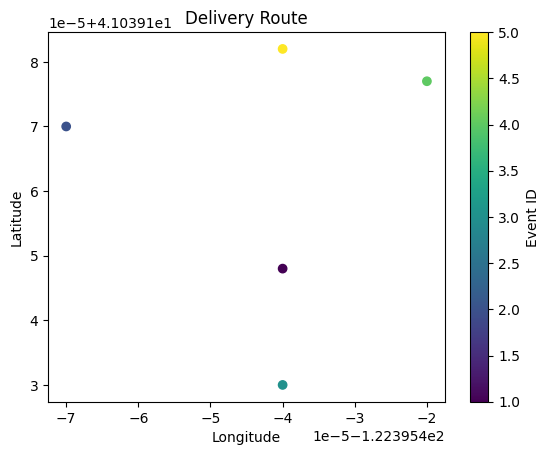

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
data.describe()

# Visualizations (e.g., user's route on a map)
plt.scatter(data['longitude'], data['latitude'], c=data['eventId'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delivery Route')
plt.colorbar(label='Event ID')
plt.show()

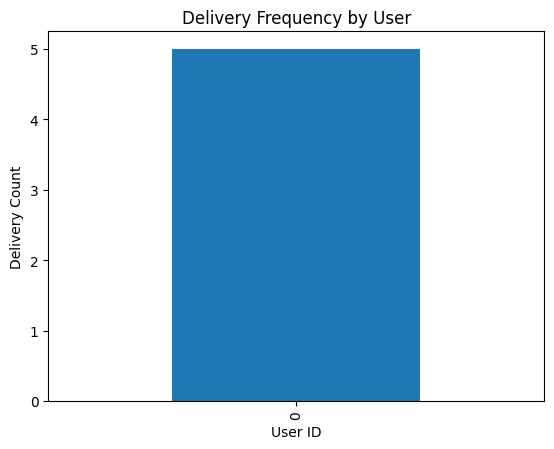

In [ ]:
user_behavior = data.groupby('uuid').agg({
    'timestamp': ['min', 'max', 'count'],
    'latitude': ['mean'],
    'longitude': ['mean']
}).reset_index()

# Visualize user behavior
# Example: Plot user delivery count over time
user_behavior['timestamp']['count'].plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Delivery Count')
plt.title('Delivery Frequency by User')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


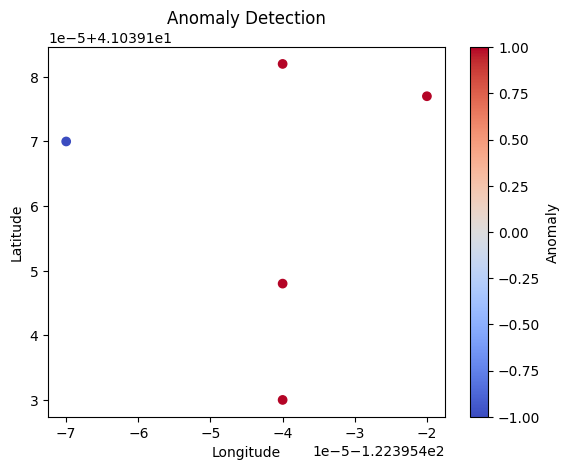

In [ ]:
from sklearn.ensemble import IsolationForest

# Anomaly detection using Isolation Forest
model = IsolationForest(contamination=0.05)
data['is_anomaly'] = model.fit_predict(data[['latitude', 'longitude']])

# Visualize anomalies on the map
plt.scatter(data['longitude'], data['latitude'], c=data['is_anomaly'], cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection')
plt.colorbar(label='Anomaly')
plt.show()

<ipython-input-17-ad5435aa8d15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


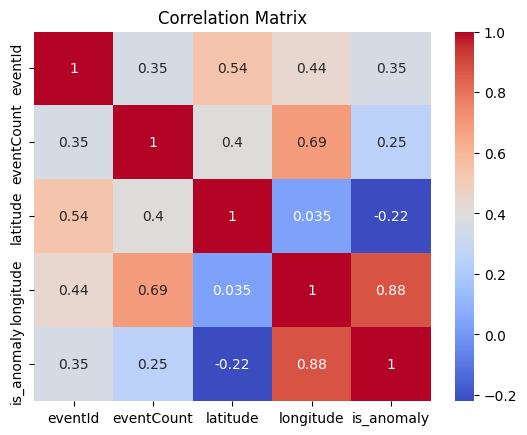

In [ ]:
# Correlation analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()